In [1]:
from ipynb.fs.full.Models import *
download = False

In [2]:
country='Italy'
j=c_index[country]
j

0

# BEST PLOTS for each SIR-type model
Criterion: AIC based on a time-series cost function

In [3]:
#time params
lock_params = ['t_lock', 'beta_lock']
exp_params = ['alpha']
fermi_params = ['alpha', 't_lock']
rational_params = ['alpha']
time_params = [lock_params,exp_params,fermi_params,rational_params]
time_params

[['t_lock', 'beta_lock'], ['alpha'], ['alpha', 't_lock'], ['alpha']]

In [4]:
sirtypes = [SIR,SIAR,SEIAR]
sirtype_strings = ['SIR','SIAR','SEIAR']

In [5]:
mods = []
best_params = []
labels = []

for i, sirtype in enumerate(sirtypes):
    #####params
    csv = pd.read_csv('params/'+sirtype_strings[i]+'_models.csv', sep=',',index_col=0)
    csv = csv[csv.country==country]

    best = csv.iloc[0]
    time = best[4]
    weight = [best[5],best[6]]
    #load params
    opt_params = []
    #SIR-mod params
    for p in best.keys()[7:-3]: #general for SIAR, SEIAR
        opt_params.append(best[p])
    #time params
    j = [i for i in range(4) if times[i]==time][0]
    for p in time_params[j]:
        opt_params.append(best[p])
    
    #####model
    mod = Model(country,sirtype,time=time,start=starts[c_index[country]],download=download)
    
    #####label
    label= sirtype_strings[i]+'-'+time+'-'+str(weight[0])+'-'+str(weight[1])
    
    best_params.append(opt_params)
    mods.append(mod)
    labels.append(label)

Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SEIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


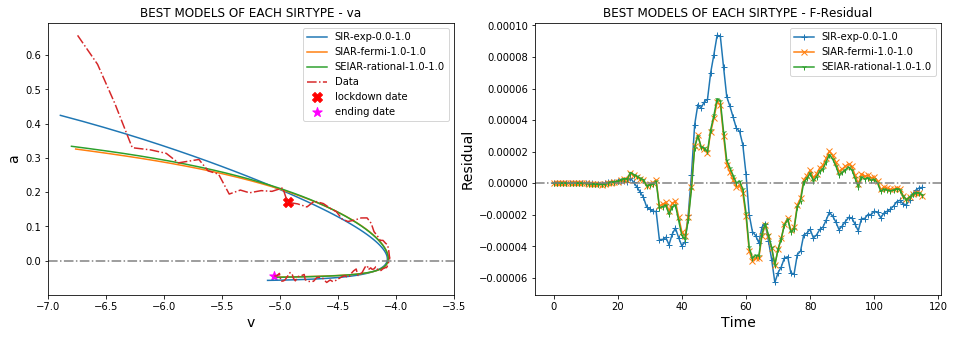

In [6]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(16,5))
markers = ['+','x','1','3','.']

for i,mod in enumerate(mods):
    #v-a plot
    v_sim,a_sim = mod.predict(best_params[i])
    ax.plot(v_sim,a_sim, label=labels[i])
    
    #residual plot
    y=(mod.data/mod.N-mod.predict(best_params[i],out='F')) #RESIDUALS
    #plot
    x=range(len(y))
    ax2.plot(x,y, label=labels[i], marker=markers[i])

    
#data 
ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                c='red',marker='X',s=100, label='lockdown date')
ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                c='magenta',marker='*',s=100,zorder=2, label='ending date')
    
#beauty corner
ax.set_xlim([-7., -3.5]) #not useful for fixed country
ax.axhline(y=0, color='gray', linestyle='-.')
ax.legend()
ax.set_xlabel('v', size=14)
ax.set_ylabel('a', size=14)
ax.set_title('BEST MODELS OF EACH SIRTYPE - va')

ax2.axhline(y=0, color='gray', linestyle='-.')
ax2.legend()
ax2.set_xlabel('Time', size=14)
ax2.set_ylabel('Residual', size=14)
ax2.set_title('BEST MODELS OF EACH SIRTYPE - F-Residual')
    
plt.show()

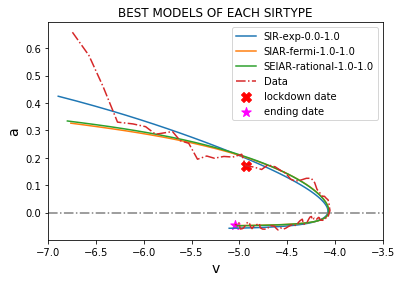

In [8]:
#plot cell
for i,mod in enumerate(mods):
    #v-a plot
    v_sim,a_sim = mod.predict(best_params[i])
    plt.plot(v_sim,a_sim, label=labels[i])

#data
plt.plot(mod.v_data, mod.a_data, '-.', label='Data')
plt.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                c='red',marker='X',s=100, label='lockdown date')
plt.scatter(mod.v_data[-1], mod.a_data[-1], 
                c='magenta',marker='*',s=100,zorder=2, label='ending date')

#beauty corner
plt.xlim([-7., -3.5]) #not useful for fixed country
plt.axhline(y=0, color='gray', linestyle='-.')
plt.legend()
plt.xlabel('v', size=14)
plt.ylabel('a', size=14)
plt.title('BEST MODELS OF EACH SIRTYPE')
plt.show()